# Exploratory Data Analysis — Personal Finance Dataset

In this notebook, we explore financial and demographic patterns of 20,000 individuals in India.  
We’ll focus on:
- Income distribution and demographics
- Spending breakdown (Rent, Groceries, Transport, etc.)
- Savings behavior
- Relationships between income, expenses, and demographics


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw_finances_data.csv")

print("Shape:", df.shape)
df.head()


Shape: (20000, 27)


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


# Numeric Summary
Finding mean, median, min, max of income, expenses, and savings columns.


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


# Income distribution

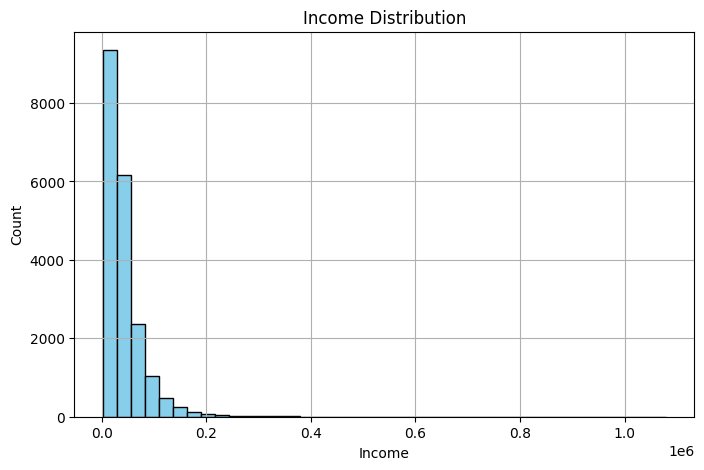

In [4]:
plt.figure(figsize=(8,5))
df['Income'].hist(bins=40, color="skyblue", edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Average expenses by category

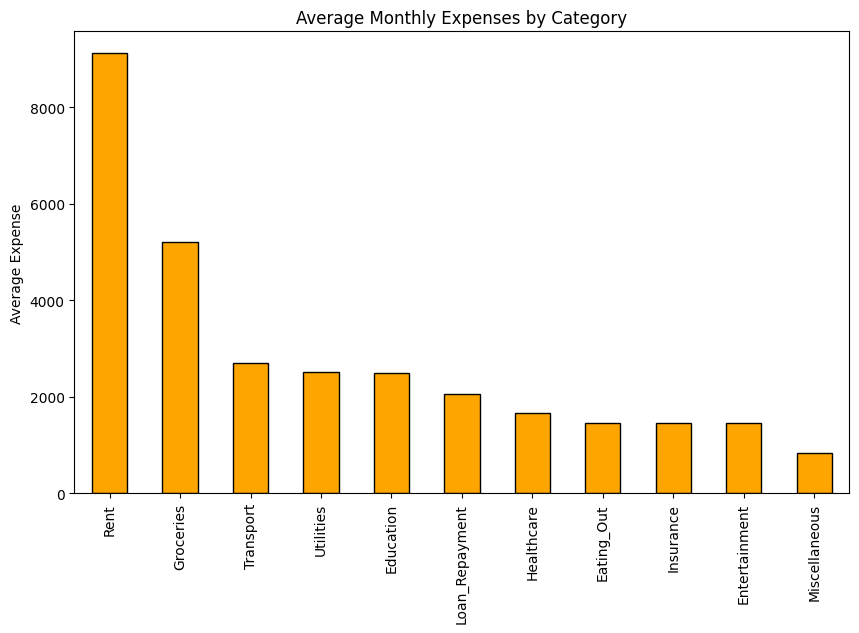

In [5]:
expense_cols = [
    'Rent','Loan_Repayment','Insurance','Groceries','Transport',
    'Eating_Out','Entertainment','Utilities','Healthcare','Education','Miscellaneous'
]

avg_expenses = df[expense_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_expenses.plot(kind='bar', color="orange", edgecolor="black")
plt.title("Average Monthly Expenses by Category")
plt.ylabel("Average Expense")
plt.show()

Column savings_Rate

In [8]:
df['Savings_Rate'] = (df['Desired_Savings'] / df['Income']) * 100


# Savings Rate distribution

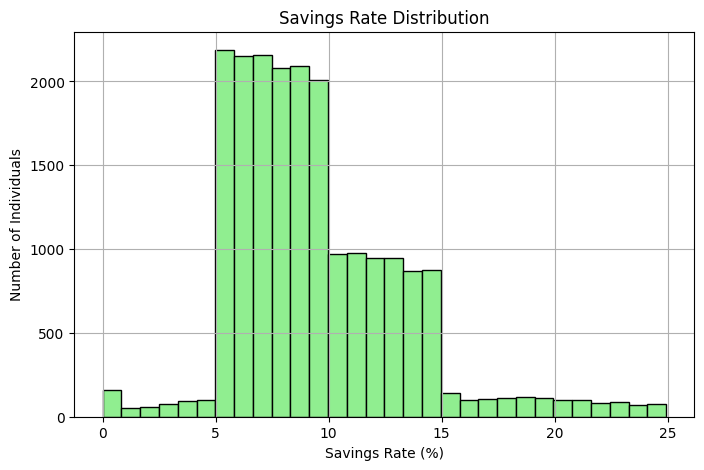

In [9]:
plt.figure(figsize=(8,5))
df['Savings_Rate'].hist(bins=30, color="lightgreen", edgecolor="black")
plt.title("Savings Rate Distribution")
plt.xlabel("Savings Rate (%)")
plt.ylabel("Number of Individuals")
plt.show()

# Savings vs Income

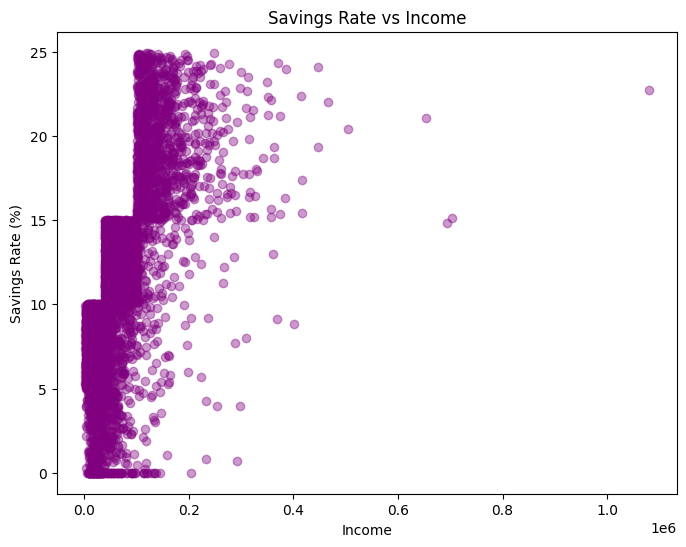

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['Savings_Rate'], alpha=0.4, color="purple")
plt.title("Savings Rate vs Income")
plt.xlabel("Income")
plt.ylabel("Savings Rate (%)")
plt.show()

# City Tier vs Income

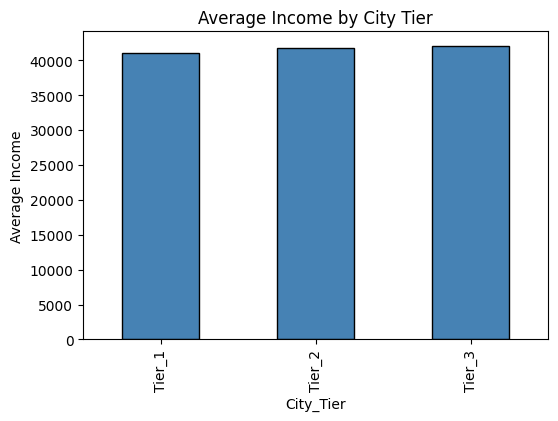

In [11]:
df.groupby("City_Tier")['Income'].mean().plot(kind='bar', color="steelblue", edgecolor="black", figsize=(6,4))
plt.title("Average Income by City Tier")
plt.ylabel("Average Income")
plt.show()


# Age group spending patterns

C:\Users\Salman\AppData\Local\Temp\ipykernel_6184\4108351003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_expenses = df.groupby("Age_Group")[expense_cols].mean()


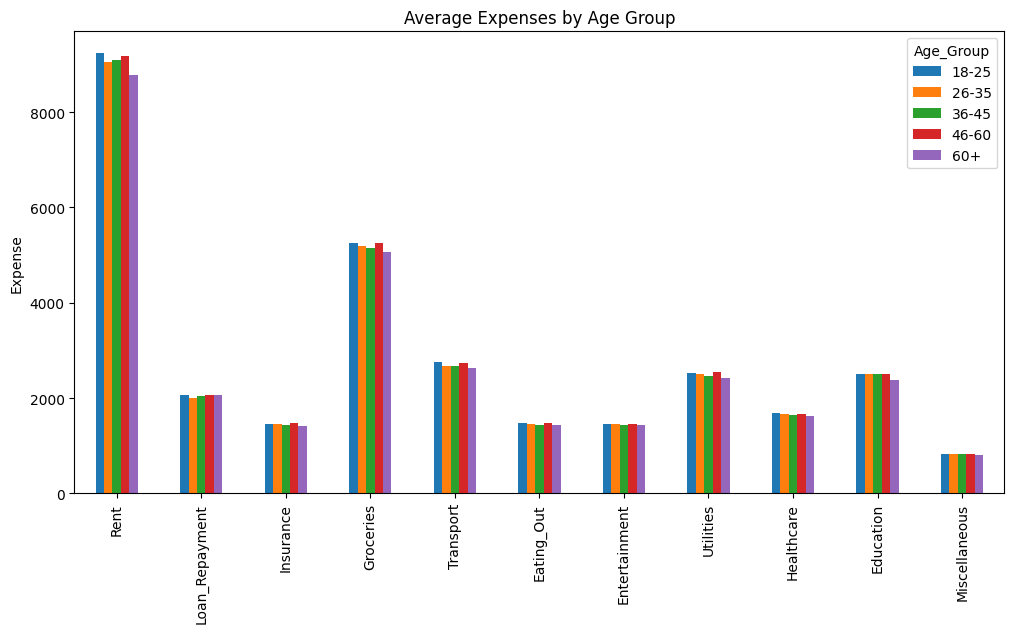

In [12]:
# create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18,25,35,45,60,100], labels=["18-25","26-35","36-45","46-60","60+"])

age_expenses = df.groupby("Age_Group")[expense_cols].mean()

age_expenses.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Expenses by Age Group")
plt.ylabel("Expense")
plt.show()


# Correlation heatmap (expenses + income + savings)

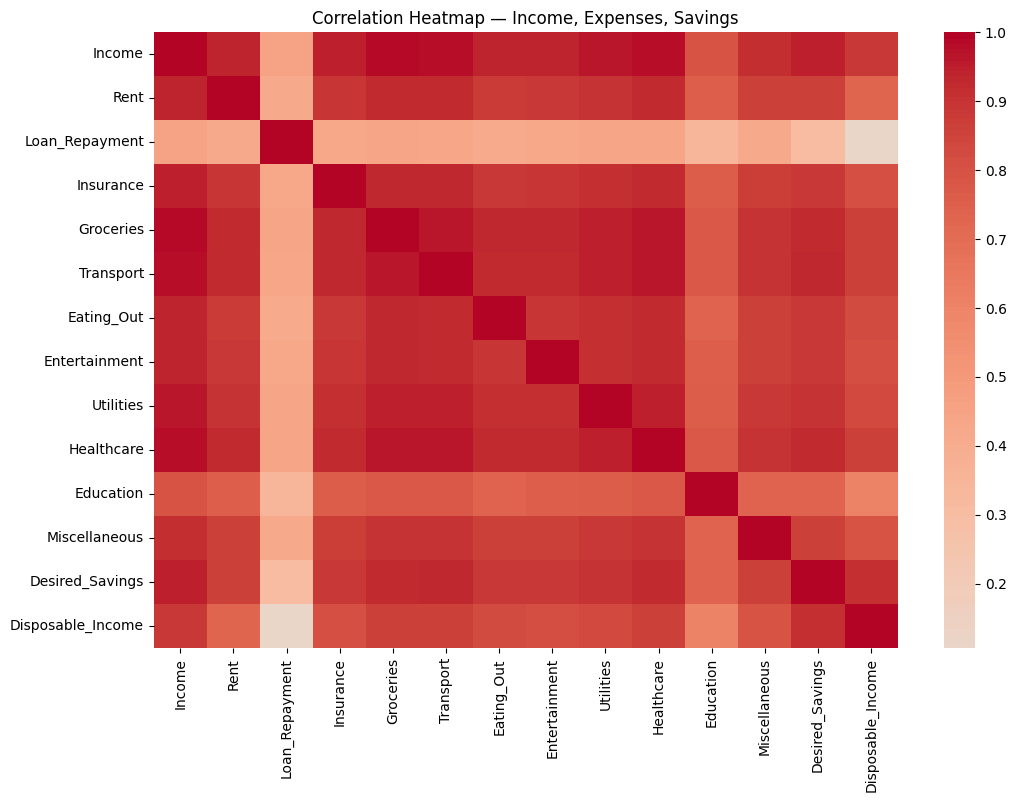

In [13]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df[['Income'] + expense_cols + ['Desired_Savings','Disposable_Income']].corr(),
            annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Income, Expenses, Savings")
plt.show()
